In [58]:
import pandas as pd

In [59]:
df = pd.read_excel("output.xlsx")

In [60]:
df.head()

,Unnamed: 0,X,y
0,0,4.967142,-0.347171
1,1,-1.382643,-1.532612
2,2,6.476885,2.553014
3,3,15.230299,6.010595
4,4,-2.341534,-1.493338


In [61]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, GridSearchCV

In [62]:
df = df.drop(["Unnamed: 0"],1)

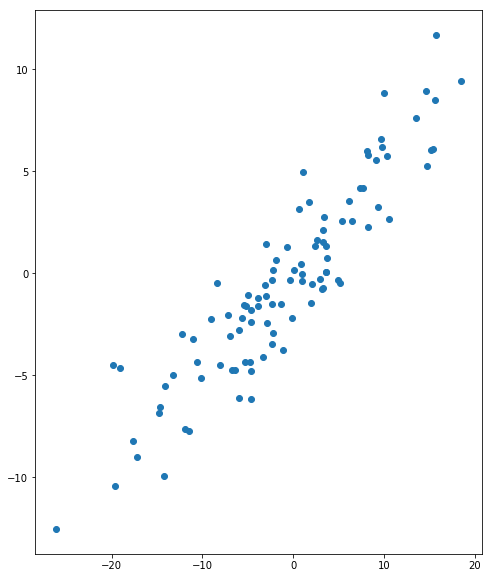

In [63]:
plt.scatter(df["X"], df["y"])

In [64]:
X = df["X"]

In [65]:
y = df["y"]

In [66]:
X.shape

(100,)

In [67]:
X = np.array(X).reshape(-1,1)

In [68]:
X.shape

(100, 1)

In [69]:
y.shape

(100,)

In [70]:
lin_reg = LinearRegression()

In [71]:
model = lin_reg.fit(X,y)

In [72]:
model.intercept_

0.014855659727933901

In [73]:
model.coef_

array([0.47134857])

In [74]:
y_pred = lin_reg.predict(X)

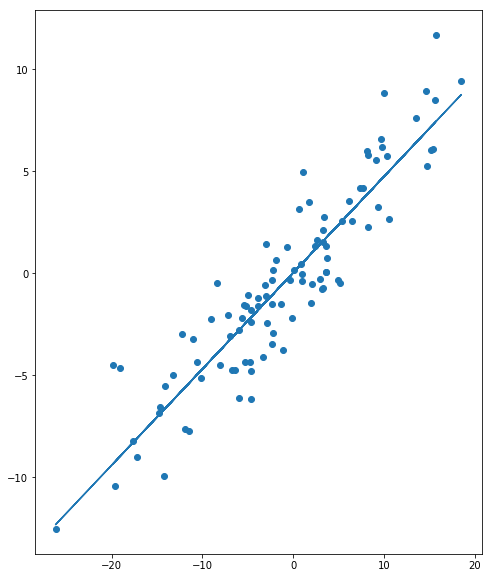

In [75]:
plt.scatter(df["X"], df["y"])
plt.plot(X, y_pred)

In [76]:
y = np.array(y)

In [77]:
idxmax = y.argmax()

In [78]:
y[idxmax] = 200

In [79]:
idx = y.argmax()
y[idx] = 200

In [80]:
idx = y.argmax()
y[idx] = 200
idx= y.argmin()
y[idx] = -200

In [81]:
lin_reg = LinearRegression(normalize=True)

[1.43713995]


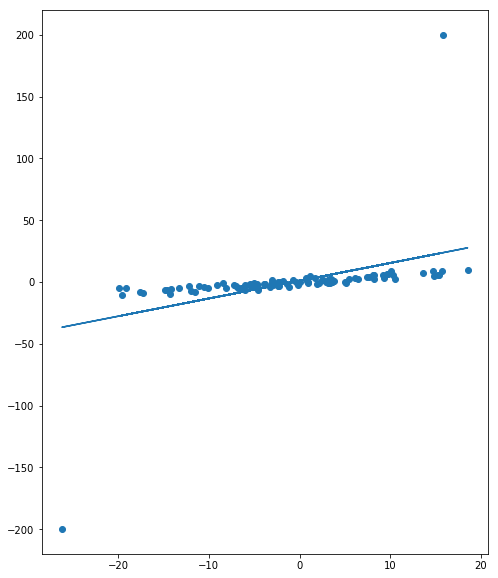

In [82]:
plt.scatter(X,y)
lin_reg.fit(X,y)
model = lin_reg.predict(X)
plt.plot(X,model)
print (lin_reg.coef_)

array([0.0014357])

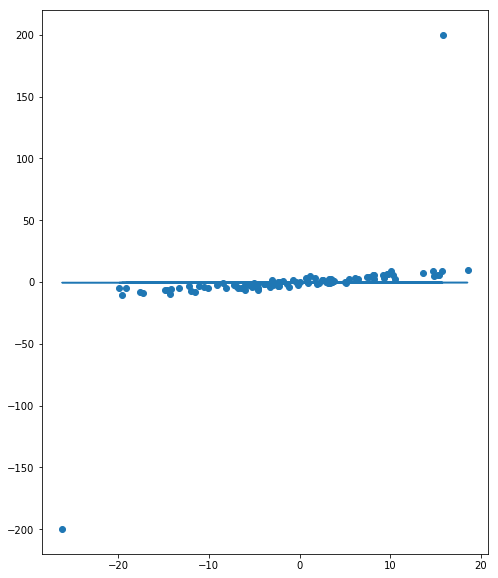

In [83]:
ridge = Ridge(alpha=1000, normalize=True)
plt.scatter(X,y)
ridge.fit(X,y)
model = ridge.predict(X)
plt.plot(X,model)
ridge.coef_

In [84]:
df = pd.read_csv("Consumo_cerveja.csv")

In [85]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [86]:
cols = ["Date", "med_temp", "min_temp", "max_temp", "humidity", "weekend", "litres"]

In [87]:
df.columns = cols

In [88]:
df.head()

,Date,med_temp,min_temp,max_temp,humidity,weekend,litres
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [89]:
df.drop(["Date"],1, inplace=True)

In [90]:
df.head()

,med_temp,min_temp,max_temp,humidity,weekend,litres
0,"27,3","23,9","32,5",0,0.0,25.461
1,"27,02","24,5","33,5",0,0.0,28.972
2,"24,82","22,4","29,9",0,1.0,30.814
3,"23,98","21,5","28,6","1,2",1.0,29.799
4,"23,82",21,"28,3",0,0.0,28.900


In [91]:
df["med_temp"] = df["med_temp"].str.replace(",", ".").astype(float)
df["min_temp"]=df["min_temp"].str.replace(",", ".").astype(float)
df["max_temp"]=df["max_temp"].str.replace(",", ".").astype(float)



In [92]:
df.head()

,med_temp,min_temp,max_temp,humidity,weekend,litres
0,27.30,23.9,32.5,0,0.0,25.461
1,27.02,24.5,33.5,0,0.0,28.972
2,24.82,22.4,29.9,0,1.0,30.814
3,23.98,21.5,28.6,"1,2",1.0,29.799
4,23.82,21.0,28.3,0,0.0,28.900


In [93]:
df["humidity"] = df["humidity"].str.replace(",",".").astype(float)
df = df.dropna()

In [94]:
df.corr()

,med_temp,min_temp,max_temp,humidity,weekend,litres
med_temp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
min_temp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
max_temp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
humidity,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
litres,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [95]:
import seaborn as sns

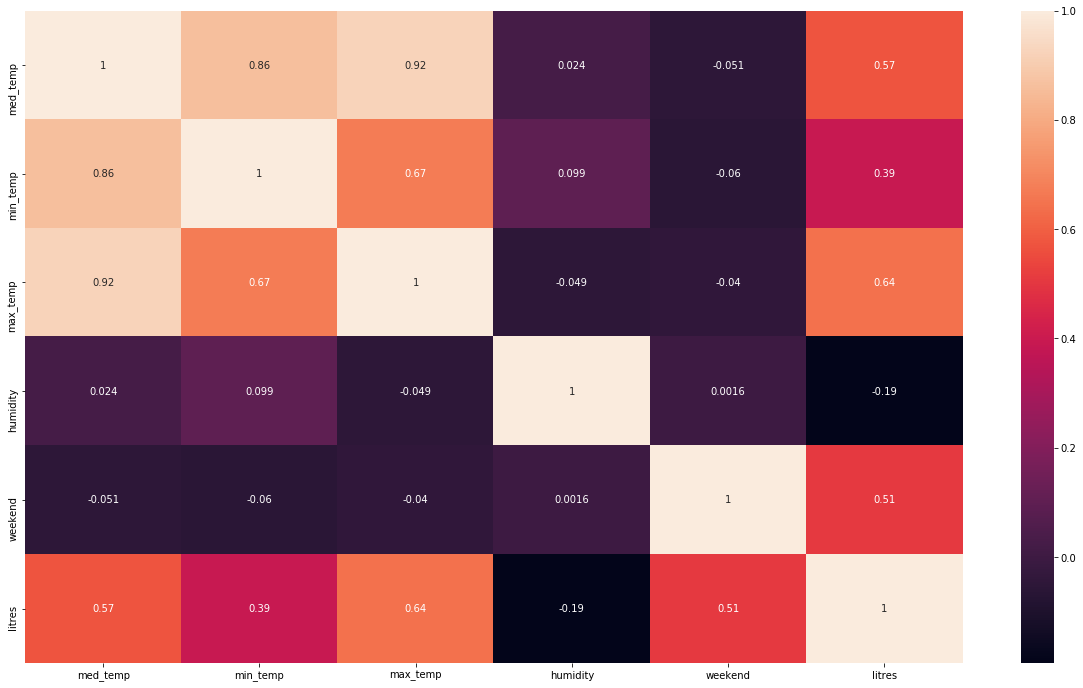

In [96]:
plt.figure(figsize=(21,12))
sns.heatmap(df.corr(), annot=True)

In [97]:
cols = list(df)

In [98]:
X = df[['med_temp', 'min_temp', 'max_temp', 'humidity', 'weekend']]
y = df["litres"]
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.25, 
                                      random_state=42)
from sklearn.metrics import r2_score
lin_reg.fit(X_train,y_train)
y_pred= lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.7452072170804511

In [99]:
from sklearn.model_selection import cross_val_score


In [100]:
model = LinearRegression()

In [101]:
-cross_val_score(model, X,y, cv = 10, scoring="neg_mean_squared_error")

array([7.63984099, 5.86895804, 5.80650946, 4.79577871, 3.29213044,
       5.209991  , 4.03241078, 7.18819605, 6.25167968, 6.49566854])

In [102]:
cross_val_score(model, X,y, cv = 10)

array([0.58839753, 0.50760468, 0.58148058, 0.63480466, 0.8095751 ,
       0.75974495, 0.71076483, 0.59478944, 0.54005214, 0.54649093])

In [103]:
alphas = np.arange(0,2,0.1)

In [104]:
alphas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [105]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [106]:
model_ridge = Ridge()

In [107]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [108]:
cv_ridge = pd.Series(cv_ridge, index = alphas)

In [109]:
cv_ridge

0.0    2.402346
0.1    2.402286
0.2    2.402232
0.3    2.402184
0.4    2.402144
0.5    2.402109
0.6    2.402082
0.7    2.402060
0.8    2.402046
0.9    2.402037
1.0    2.402035
1.1    2.402038
1.2    2.402048
1.3    2.402064
1.4    2.402086
1.5    2.402114
1.6    2.402148
1.7    2.402188
1.8    2.402233
1.9    2.402284
dtype: float64

Text(0, 0.5, 'rmse')

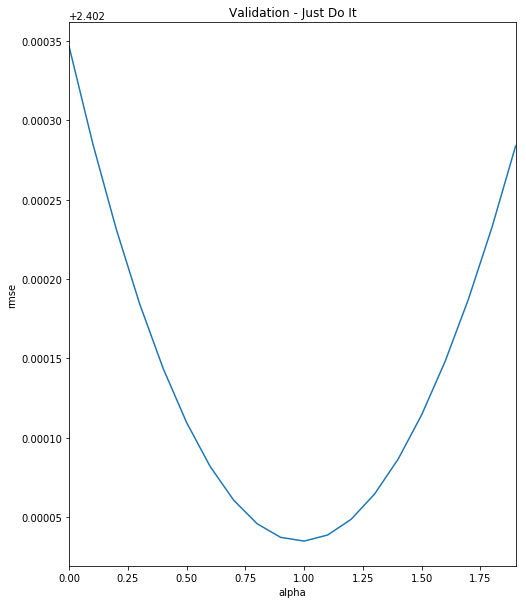

In [110]:
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [111]:
model = Ridge(alpha=1)
model.fit(X,y)
model.score(X,y)

0.7225995691802622

In [113]:
df = pd.read_csv("Credit.csv")

In [114]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [115]:
df = df.drop(["Unnamed: 0"],1)
X = df.drop(["Balance"],1)
y = df["Balance"]

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

In [117]:
X = pd.get_dummies(X)
cols = list(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0.025737,0.210675,0.213723,0.125,0.146667,0.400000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.542722,0.443406,0.438695,0.250,0.786667,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.534598,0.476336,0.473566,0.375,0.640000,0.400000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.786079,0.662353,0.661417,0.250,0.173333,0.400000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.258271,0.309542,0.296963,0.125,0.600000,0.733333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [118]:
drop = ['Gender_ Male','Student_No','Married_No', 'Ethnicity_African American']

In [119]:
X= X.drop(drop,1)

In [120]:
categorical = list(X)[-5:]

In [121]:
X.dtypes

Income                 float64
Limit                  float64
Rating                 float64
Cards                  float64
Age                    float64
Education              float64
Gender_Female          float64
Student_Yes            float64
Married_Yes            float64
Ethnicity_Asian        float64
Ethnicity_Caucasian    float64
dtype: object

In [122]:
for x in categorical:
    X[x] = X[x].astype("category")

In [123]:
X.dtypes

Income                  float64
Limit                   float64
Rating                  float64
Cards                   float64
Age                     float64
Education               float64
Gender_Female          category
Student_Yes            category
Married_Yes            category
Ethnicity_Asian        category
Ethnicity_Caucasian    category
dtype: object

In [124]:
y = pd.DataFrame(y)

In [125]:
y.columns = ["Balance"]

In [126]:
df = pd.concat([X,y],1)

In [127]:
numeric = df.select_dtypes(include = np.number)
non_numeric = df.select_dtypes(exclude = np.number)

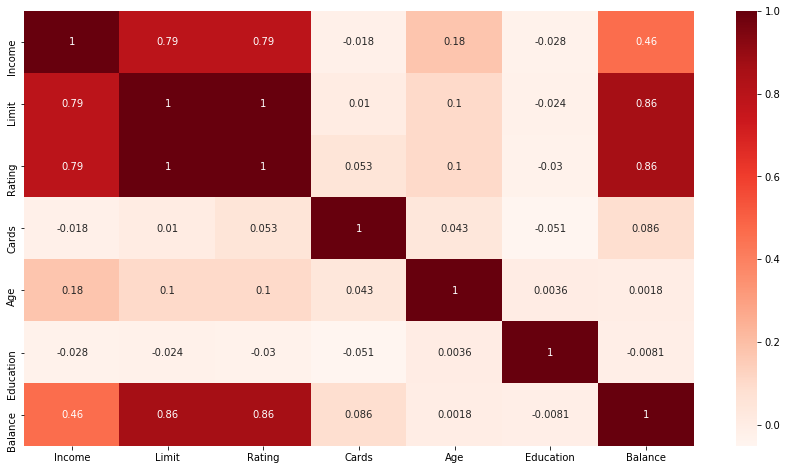

In [128]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric.corr(), annot=True, cmap=plt.cm.Reds)

In [129]:
cols = list(df)[-6:-1]

In [130]:
for x in cols:
    df[x] = df[x].astype("int")

In [131]:
import statsmodels.formula.api as smf

In [132]:
results = smf.ols('Balance~Limit+Gender_Female+Student_Yes+Married_Yes+Ethnicity_Asian+Ethnicity_Caucasian', data=df).fit()

In [133]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     284.5
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          1.24e-139
Time:                        22:50:45   Log-Likelihood:                -2684.2
No. Observations:                 400   AIC:                             5382.
Df Residuals:                     393   BIC:                             5410.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -195.3800     30.477     -6.411      0.000    -255.298    -135.462
Limit                2248.3328     56.848     39.550      0.000    2136.568    2360.097
Gender_Female          -1.1163     20.092     -0.056      0.956     -40.617      38.384
Student_Yes           403.0036     33.616     11.988      0.000     336.914     469.094
Married_Yes           -13.4505     20.795     -0.647      0.518     -54.334      27.433
Ethnicity_Asian        20.0002     28.530      0.701      0.484     -36.090      76.090
Ethnicity_Caucasian    21.4012     24.736      0.865      0.387     -27.231      70.033
==============================================================================
Omnibus:                        7.408   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.298
Skew:                          -0.324   Prob(JB):                       0.0260
Kurtosis:                       3.130   Cond. No.                         8.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
X = df.drop(["Balance"],1)
y = df["Balance"]

In [135]:
features = ['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender_Female',
 'Student_Yes',
 'Married_Yes',
 'Ethnicity_Asian',
 'Ethnicity_Caucasian']

In [136]:
import statsmodels.api as sm
features = ['Income',
 'Limit',
 'Rating',
 'Student_Yes']
X = df[features]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()

C:\Users\Ajay\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1967.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          3.06e-259
Time:                        22:50:46   Log-Likelihood:                -2411.3
No. Observations:                 400   AIC:                             4833.
Df Residuals:                     395   BIC:                             4852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -291.2277     10.513    -27.700      0.000    -311.897    -270.558
Income      -1400.4801     41.505    -33.742      0.000   -1482.079   -1318.881
Limit        1588.9299    363.824      4.367      0.000     873.657    2304.203
Rating       1947.3000    368.879      5.279      0.000    1222.088    2672.512
Student_Yes   422.6684     16.874     25.049      0.000     389.495     455.842
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.945
Skew:                           0.647   Prob(JB):                     8.55e-07
Kurtosis:                       2.963   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.9521875044403831

In [138]:
cross_val_score(lin_reg,X,y,cv = 10).mean()

0.9486481287322908

In [139]:
from sklearn.feature_selection import RFE

In [140]:
rfe = RFE(lin_reg, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False  True  True  True  True]
Feature Ranking: [2 1 1 1 1]


In [141]:
# X = df.drop(["Balance"],1)
features = ['Income',
 'Limit',
 'Rating',
 'Student_Yes']
X = df[features]
y = df["Balance"]

In [142]:
reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print(reg.score(X,y))

Best alpha using built-in RidgeCV: 0.100000
0.9519690927376536


In [143]:
reg = LassoCV()
X = df.drop(["Balance"],1)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print(reg.score(X,y))
reg.alpha_

Best alpha using built-in LassoCV: 0.069854
0.9550919325714283


C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.06985448564098636

In [144]:
coef = pd.Series(reg.coef_, index = X.columns)

In [145]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 0 variables


In [146]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

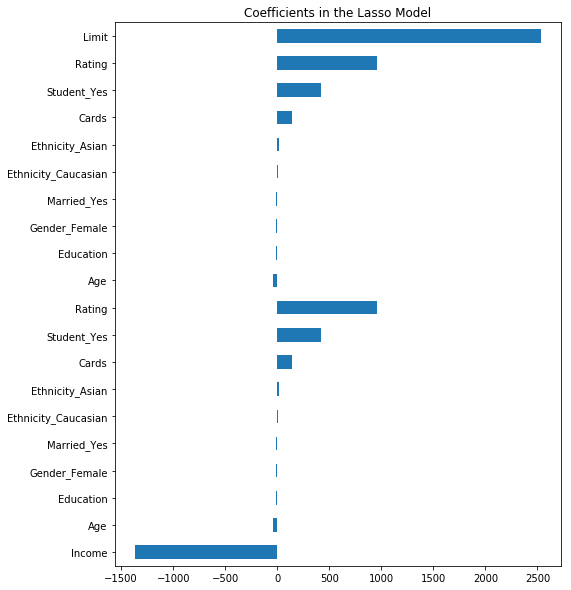

In [147]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")